In [1]:

from PIL import Image
import numpy as np
import os
import cv2
from shapely.geometry import Polygon, MultiPolygon
from tqdm import tqdm

In [2]:
def binary_mask_to_polygon(binary_mask):
    # binary_mask는 2차원 numpy array여야 합니다.
    # Contours를 찾습니다.
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    polygons = []
    for contour in contours:
        # 각 contour를 polygon으로 변환
        if len(contour) >= 3:  # 유효한 polygon을 만들기 위해서 최소한 3개의 점이 필요합니다.
            poly = Polygon(shell=[(point[0][0], point[0][1]) for point in contour])
            polygons.append(poly)
    
    if len(polygons) > 1:
        # 여러 개의 polygon이 있을 경우 MultiPolygon으로 변환
        return MultiPolygon(polygons)
    elif len(polygons) == 1:
        return polygons[0]
    else:
        return None


In [3]:
from time import sleep


img=Image.open('../../data/area_segmentation/BLOP-AJ-00124-S-TP-04.tiff').convert('L').resize((512,512))
np_img=np.array(img, dtype=np.uint8)
image = Image.fromarray(np_img)
for i in tqdm(range(10000)):
    image.save('../../data/area_segmentation/새 폴더/{}.tiff'.format(i))

np_img.shape

100%|██████████| 10000/10000 [03:23<00:00, 49.25it/s]


(512, 512)

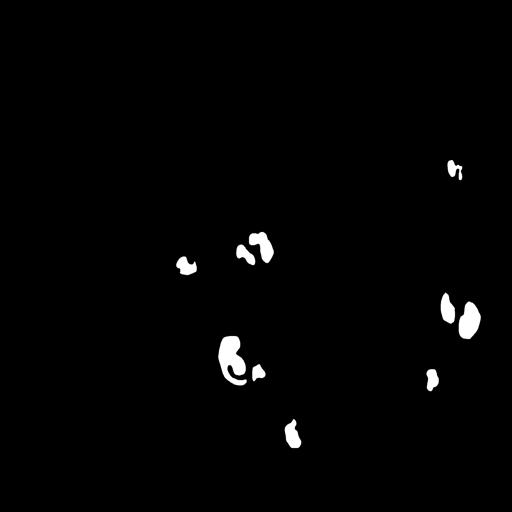

In [33]:
img

In [28]:
import socket
import select

# 소켓 생성 및 논블로킹 설정
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.setblocking(False)

try:
    # 연결 시도
    sock.connect(('localhost', 8080))
except BlockingIOError:
    # 연결 중인지 확인
    while True:
        ready = select.select([], [sock], [], 5)
        if sock in ready[1]:
            break

# 데이터 전송 예시
try:
    sock.sendall(b'Hello, world')
except BlockingIOError as e:
    print(f"Resource temporarily unavailable: {e}")

ConnectionRefusedError: [Errno 111] Connection refused

In [24]:
import socket
import time

def connect_with_retry(host, port, retries=5, delay=2):
    for i in range(retries):
        try:
            sock = socket.create_connection((host, port))
            return sock
        except BlockingIOError:
            print(f"연결 시도 실패, {delay}초 후 재시도 ({i+1}/{retries})")
            time.sleep(delay)
    raise Exception("연결 실패")

# 연결 시도
sock = connect_with_retry('example.com', 80)
print("소켓이 연결되었습니다!")


소켓이 연결되었습니다!


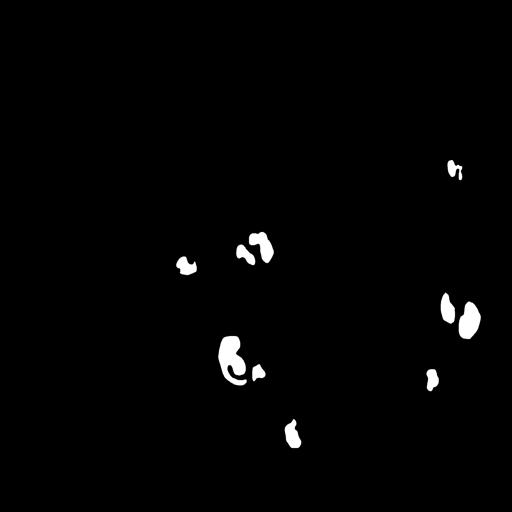

In [23]:
img